In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import glob
from IPython.display import clear_output

Lo primero que tenemos que hacer es cargar uno de los clips y sacar los frames:

In [2]:
def extract_frames(path_to_video, directory_to_save):    
    """Coge un vídeo y extrae todos sus frames en la carpeta especificada"""
    vidcap = cv2.VideoCapture(path_to_video)
    success,image = vidcap.read()
    count = 0
    while success:
        cv2.imwrite(f"{directory_to_save}/frame%d.jpg" % count, image)     # save frame as JPEG file      
        success,image = vidcap.read()
        count += 1
    print(f"Extracted {count} frames!")

Ahora cargamos una imagen aleatoria y ajustamos el crop del mando y de la pantalla:

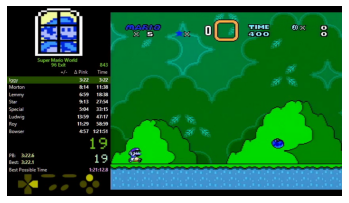

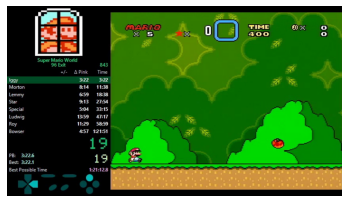

In [3]:
test = cv2.imread("Frames/1-1/Full/frame0.jpg")
#CV2 carga las imágenes como BGR y para pintarlas con Matplotlib las queremos como RGB (En general las ponemos así por costumbre)
plt.imshow(test)
plt.axis("off")
plt.show()
#Con cv2.cvtColor(imagen, conversión) podemos cambiar los colores sin mucho problema
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [4]:
test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)

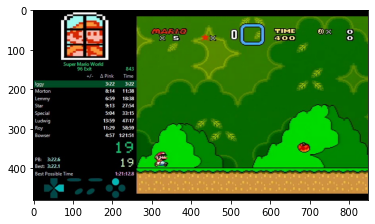

(480, 848, 3)

In [5]:
plt.imshow(test)
plt.show()
test.shape

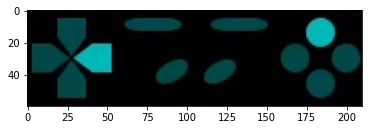

In [6]:
plt.imshow(test[420:,25:235])
plt.show()

In [7]:
def crop_controller(img):
    """Coge un frame completo y devuelve únicamente la porción correspondiente al mando"""
    return img[420:,25:235]

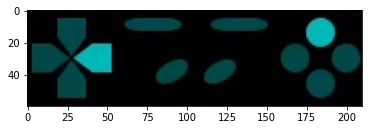

In [8]:
plt.imshow(crop_controller(test))
plt.show()

In [9]:
def crop_only_buttons(img):
    """
    Coge un frame completo y devuelve únicamente la porción correspondiente a los botones
    
    img -> NumPy Array
    """
    return img[420:,183:235]

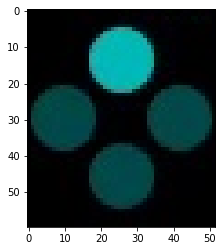

In [10]:
plt.imshow(crop_only_buttons(test))
plt.show()

Ahora vamos a ver si conseguimos cortar el cachito de todos los frames que tenemos:

In [33]:
for full_frame_path in glob.glob("Frames/1-1/Full/*.jpg"):
    #Esto de los colores no hace falta porque si lo cargas con cv2 y lo guardas con lo mismo
    #ya se apaña para que salgan bien las imágenes
    # full_frame = cv2.cvtColor(cv2.imread(full_frame_path), cv2.COLOR_BGR2RGB)
    full_frame = cv2.imread(full_frame_path)
    button_frame = crop_only_buttons(full_frame)
    #Haciendo el replace podemos estar seguros de que se corresponden entre sí.
    cv2.imwrite(full_frame_path.replace("Full", "Buttons"), button_frame) 
print("Done!")

Done!


### Prueba máscara

In [24]:
mask = cv2.imread("Crops/Mask_Right_Bot.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

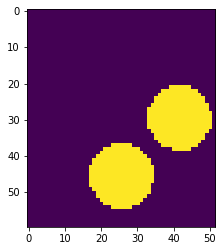

In [25]:
plt.imshow(mask)
plt.show()

In [26]:
mask.shape, crop_only_buttons(test).shape

((60, 52), (60, 52, 3))

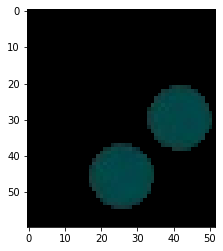

In [28]:
plt.imshow(cv2.bitwise_and(crop_only_buttons(test),crop_only_buttons(test), mask = mask))
plt.show()

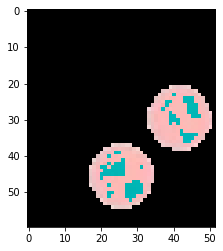

In [29]:
plt.imshow(crop_only_buttons(test)*np.expand_dims(mask,-1))
plt.show()

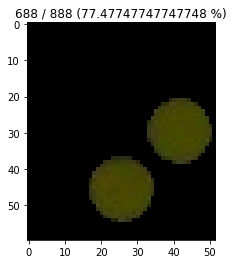

KeyboardInterrupt: Interrupted by user

In [31]:
total = len(glob.glob("Frames/1-1/Buttons/*.jpg"))
parse_dict = {"2":"down", "5":"none", "6":"right"}

mask = cv2.imread("Crops/Mask_Right_Bot.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)

for i, full_frame_path in enumerate(glob.glob("Frames/1-1/Buttons/*.jpg")):
    button_frame = cv2.imread(full_frame_path)
    button_frame = cv2.bitwise_and(button_frame, button_frame, mask = mask)
    plt.imshow(button_frame)
    plt.title(f"{i} / {total} ({i/total*100} %)")
    plt.show()
    label = input("Etiqueda: ")
    label = parse_dict[label]
    cv2.imwrite(full_frame_path.replace("Buttons", f"Labeled_BIEN/{label}"), button_frame) 
    # cv2.imwrite(f"Frames/1-1/Labeled/{label}/.jpg", button_frame)
    clear_output()

## Clasificador de Frames

In [77]:
test = cv2.imread("Frames/1-1/Full/frame74.jpg")

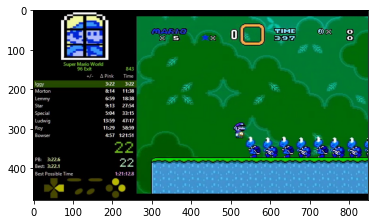

In [78]:
plt.imshow(test)
plt.show()

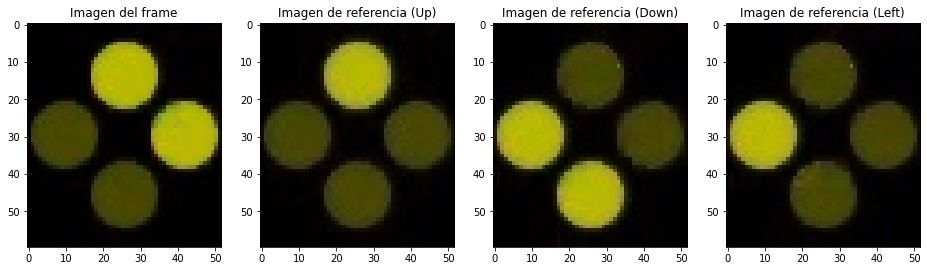

In [81]:
buttons_test = crop_only_buttons(test)
plt.figure(figsize=(16,6))
plt.subplot(1,4,1)
plt.title("Imagen del frame")
plt.imshow(buttons_test)
plt.subplot(1,4,2)
plt.title("Imagen de referencia (Up)")
plt.imshow(up_label)
plt.subplot(1,4,3)
plt.title("Imagen de referencia (Down)")
plt.imshow(down_label)
plt.subplot(1,4,4)
plt.title("Imagen de referencia (Left)")
plt.imshow(left_label)
plt.show()

In [99]:
(cv2.cvtColor(buttons_test, cv2.COLOR_BGR2GRAY) == cv2.cvtColor(up_label, cv2.COLOR_BGR2GRAY)).sum(), (cv2.cvtColor(buttons_test, cv2.COLOR_BGR2GRAY) == cv2.cvtColor(down_label, cv2.COLOR_BGR2GRAY)).sum(), (cv2.cvtColor(buttons_test, cv2.COLOR_BGR2GRAY) == cv2.cvtColor(left_label, cv2.COLOR_BGR2GRAY)).sum()

(817, 674, 822)

In [66]:
classify_frame(test)

'up'

In [74]:
for full_frame_path in glob.glob("Frames/1-1/Full/*.jpg"):
    #Esto de los colores no hace falta porque si lo cargas con cv2 y lo guardas con lo mismo
    #ya se apaña para que salgan bien las imágenes
    # full_frame = cv2.cvtColor(cv2.imread(full_frame_path), cv2.COLOR_BGR2RGB)
    full_frame = cv2.imread(full_frame_path)
    label = classify_frame(full_frame)
    #Haciendo el replace podemos estar seguros de que se corresponden entre sí.
    cv2.imwrite(full_frame_path.replace("Full", f"Full_Labeled/{label}"), full_frame) 
print("Done!")

Done!
